# into
DS for DAPS

## Summarization

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import random

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
mu, sigma = 10, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
s[0:10]

array([10.01253495,  9.93704314, 10.05415822,  9.92943389,  9.92719683,
       10.1587975 ,  9.82618547,  9.97030743,  9.85539835, 10.12958385])

In [16]:
np.mean(s)

round(12.523456, 0)

13.0

In [8]:
np.mean(s).round(3)

10.007

In [212]:
# what is wrong with round, why zero?
# np.mean(s).round()

In [9]:
np.std(s)

0.10154190575229548

## we have a data

In [17]:
random.seed(10)

salary = np.random.normal(100000, 25000, 300) #https://datasciencedegree.wisconsin.edu/data-science/data-scientist-salary/#:~:text=The%20average%20data%20scientist%20salary,to%20drive%20smart%20business%20decisions.
height = np.array([180, 186,
                   180,
                   182,
                   187,
                   169,
                   163,
                   162,
                   162,
                   170
                   ]) # survey
values = pd.read_stata("kidiq.dta") #National Longitudinal Survey of Youth

In [18]:
print(salary[:10])

print(height)

values.head()

[108722.69724001 127878.57930918  77245.45625085 138743.3147158
 110517.43438077  82725.35112291 102706.41004875 102050.44323725
 100329.23358117  75766.78825702]
[180 186 180 182 187 169 163 162 162 170]


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


### write a sentence explaining your sample based on
1. mean

In [216]:
salary.mean()

99461.83942987872

On average Data Scientist earn around 99461 USD based

In [217]:
values.kid_score.mean()

86.79723502304148

In [218]:
height.mean()

180.0

2. media

In [219]:
np.median(salary)

97768.01196215375

In [220]:
values.kid_score.median()

90.0

3. median + std
4. IQR from scipy.stats import iqr
5. mode ??
6. something else?

### plots!
1. median

<AxesSubplot:>

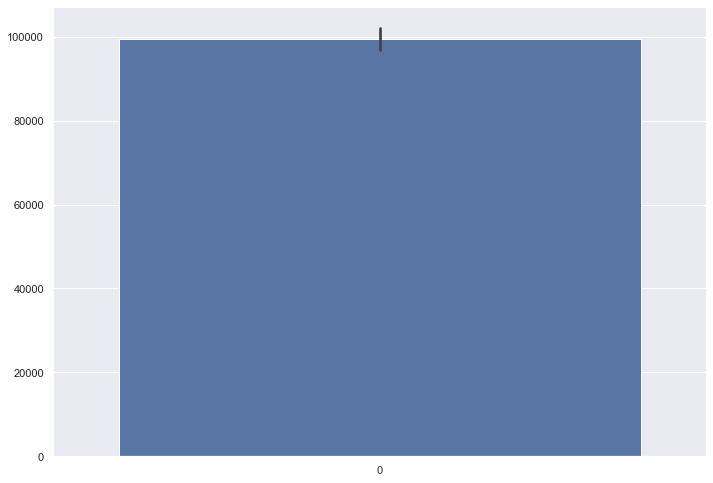

In [221]:
sns.barplot(data = salary)

<AxesSubplot:>

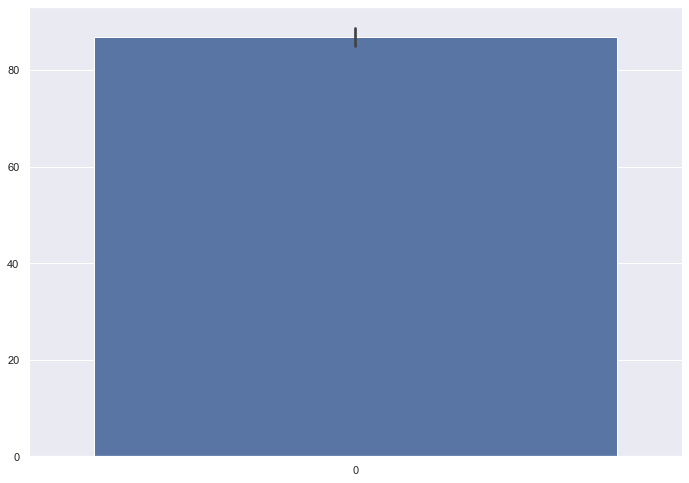

In [19]:
sns.barplot(data = values.kid_score)

2. Boxplot

<AxesSubplot:>

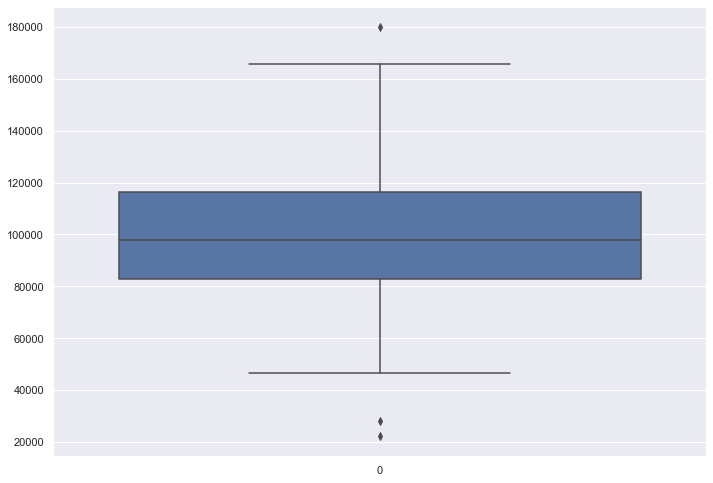

In [223]:
sns.boxplot(data = salary)

3. rainplot

In [224]:
# !pip install ptitprince

Text(0.5, 1.0, 'Figure distribution of \n Kids Scores')

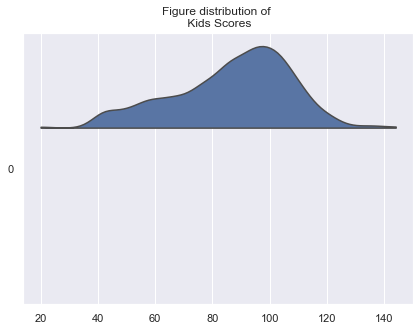

In [225]:
import os
import matplotlib.pyplot as plt
import ptitprince as pt

# plotting the clouds
f, ax = plt.subplots(figsize=(7, 5))
dy="group"; dx="score"; ort="h"; pal = sns.color_palette(n_colors=1)
ax=pt.half_violinplot( #x = dx, y = dy,
                       data = values.kid_score, palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
plt.title("Figure distribution of \n Kids Scores")

Text(0.5, 1.0, 'Figure P3\n Raincloud Without Jitter')

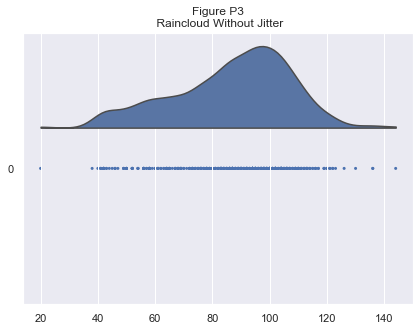

In [226]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( data = values.kid_score,palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( data = values.kid_score, palette = pal, edgecolor = "white",
                  size = 3, jitter = 0, zorder = 0, orient = ort)
plt.title("Figure P3\n Raincloud Without Jitter")

Text(0.5, 1.0, 'Figure P4\n Raincloud with Jittered Data')

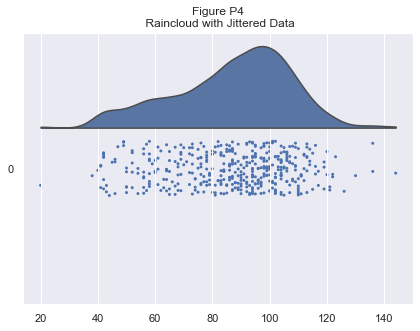

In [227]:
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( data = values.kid_score, palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( data = values.kid_score, palette = pal, edgecolor = "white",
                  size = 3, jitter = 1, zorder = 0, orient = ort)
plt.title("Figure P4\n Raincloud with Jittered Data")

Text(0.5, 1.0, 'Figure P5\n Raincloud with Boxplot')

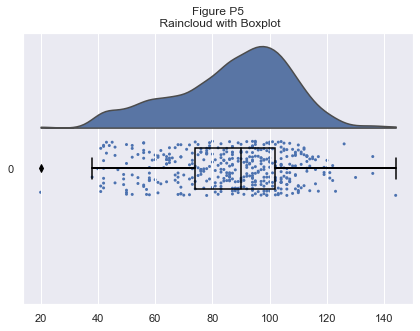

In [228]:
#adding the boxplot with quartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( data = values.kid_score, palette = pal, bw = .2, cut = 0.,
                       scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( data = values.kid_score, palette = pal, edgecolor = "white",
                  size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( data = values.kid_score, color = "black", width = .15, zorder = 10,
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},
                saturation = 1, orient = ort)
plt.title("Figure P5\n Raincloud with Boxplot")

### regression is my summarization

kid_score Child’s score on IQ test
mom_hs Did mom complete high school?
mom_iq Mother’s score on IQ test
mom_work Working mother?
mom_age Mother’s age at birth of child


In [229]:
values = pd.read_stata("kidiq.dta") #National Longitudinal Survey of Youth
values.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


In [230]:
values.median()

kid_score    90.000000
mom_hs        1.000000
mom_iq       97.915254
mom_work      3.000000
mom_age      23.000000
dtype: float64

<AxesSubplot:>

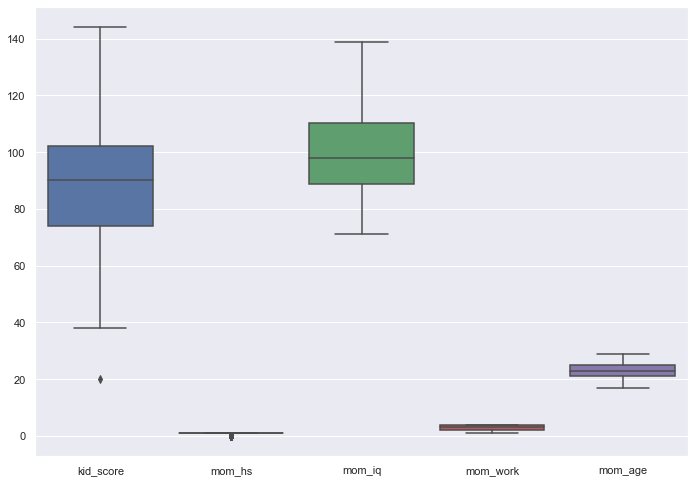

In [21]:
sns.boxplot(data = values)

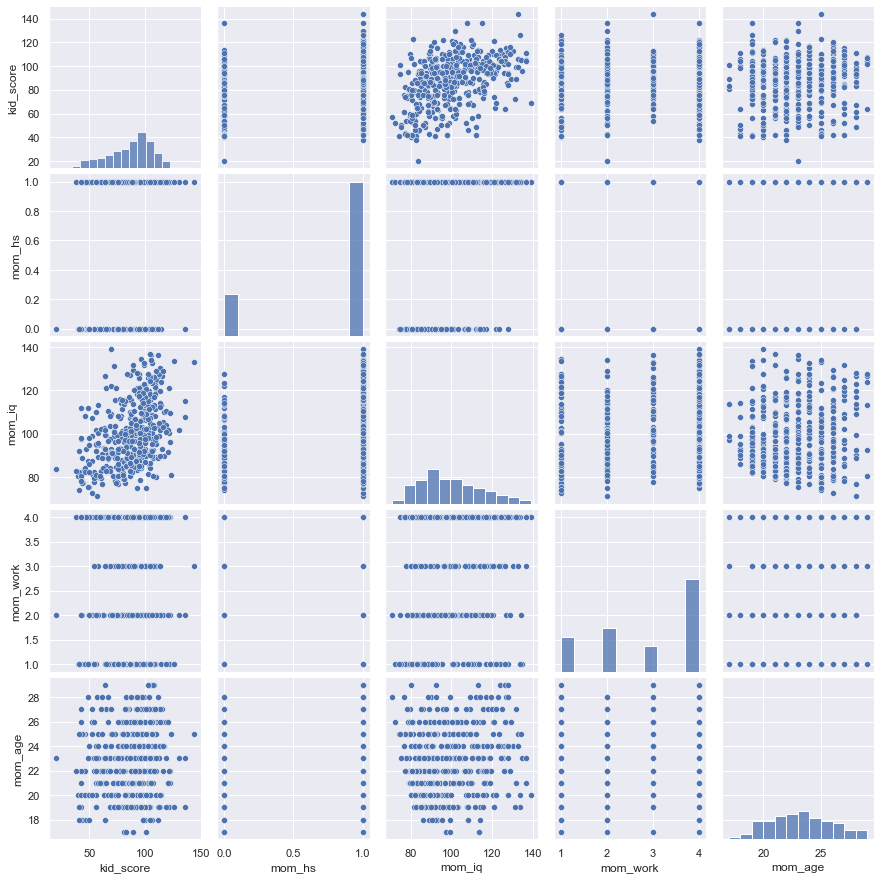

In [232]:
sns.pairplot(values)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
values.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


## simple

In [24]:
model = LinearRegression()

X = values['mom_iq'].values.reshape(-1, 1)
y = values.kid_score

model = model.fit(X = X, y = y)

In [25]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.20095123075855126


In [26]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 25.79977784996295
slope: [0.60997457]


In other words: kid_score ≈ 25.80 + 0.61 × mom_iq.

<AxesSubplot:ylabel='kid_score'>

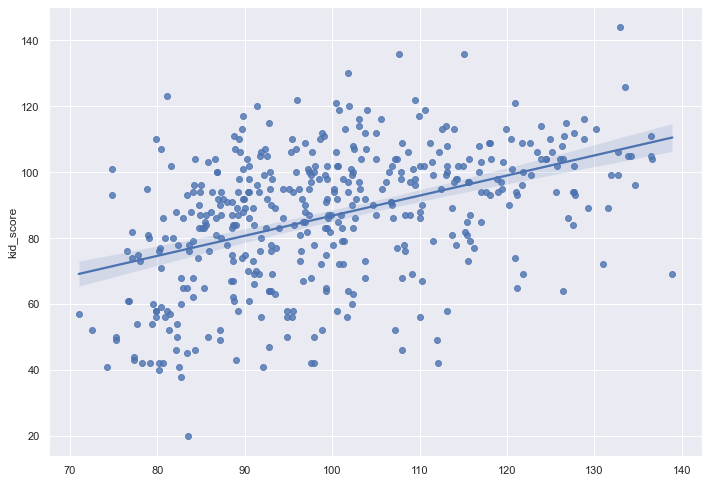

In [238]:
sns.regplot(x = X, y = y)

## Multiple

In [27]:
model = LinearRegression()

X = values.drop('kid_score', axis =1)
y = values.kid_score

model = model.fit(X = X, y = y)

In [28]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.21504503560100818


In [29]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 20.82261170327233
slope: [5.56117805 0.56208142 0.13372871 0.21985986]


In [242]:
# help(OLS)

In [30]:
from statsmodels.api import OLS

print(OLS(y, X).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:              kid_score   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              2481.
Date:                Fri, 08 Apr 2022   Prob (F-statistic):                   1.86e-295
Time:                        19:29:16   Log-Likelihood:                         -1874.3
No. Observations:                 434   AIC:                                      3757.
Df Residuals:                     430   BIC:                                      3773.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

https://stats.stackexchange.com/questions/197923/difference-between-centered-and-uncentered-r2#:~:text=Uncentered%20R2%20is%20a%20measure,is%20equivalent%20to%20the%20mean.
R-squared (uncentered)

In [244]:
import statsmodels.formula.api as smf

m1 = smf.ols(formula='kid_score ~ mom_iq + mom_hs + mom_work + mom_age + 1', data=values).fit()
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     29.38
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           1.31e-21
Time:                        23:44:35   Log-Likelihood:                -1871.7
No. Observations:                 434   AIC:                             3753.
Df Residuals:                     429   BIC:                             3774.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8226      9.188      2.266      0.0

In other words: kid_score ≈ ...

In [245]:
y_pred = model.predict(X)
# Plot outputs
y_pred[0:10]

array([100.93283337,  82.64385451,  97.74337895,  88.18026701,
        84.98556124,  85.56343619, 109.38513623, 102.18349924,
        77.67097432,  84.1336613 ])

In [246]:
output = y.to_frame()
output['pred'] = y_pred
output.head()

,kid_score,pred
0,65,100.932833
1,98,82.643855
2,85,97.743379
3,83,88.180267
4,115,84.985561


<AxesSubplot:xlabel='kid_score', ylabel='pred'>

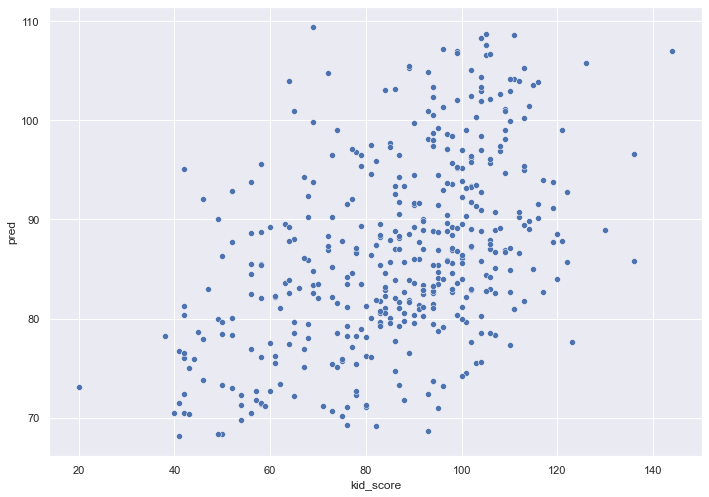

In [247]:
sns.scatterplot(x = 'kid_score', y = 'pred', data = output)

## simulation regression

In [248]:
m1_df = pd.read_html(m1.summary().tables[1].as_html(),header=0,index_col=0)[0]
m1_df

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,20.8226,9.188,2.266,0.024,2.764,38.881
mom_iq,0.5621,0.061,9.249,0.000,0.443,0.682
mom_hs,5.5612,2.313,2.404,0.017,1.014,10.108
mom_work,0.1337,0.768,0.174,0.862,-1.375,1.643
mom_age,0.2199,0.332,0.662,0.509,-0.433,0.873


In [249]:
m1_df.coef[0]

20.8226

In [250]:
n = 434
random.seed(1)
df_sim = pd.DataFrame(data={'mom_iq': np.random.normal(110, 10, n),
                            'mom_hs': random.choices([1, 0], k = n),
                            'mom_work': random.choices([1, 2, 3, 4], k = n),
                            'mom_age': np.random.normal(20, 2, n)})
random.seed(1)
df_sim['kid_score'] = np.random.normal(m1_df.coef[0], m1_df['std err'][0], n) + \
                      df_sim['mom_iq'] * np.random.normal(m1_df.coef[1], m1_df['std err'][1], n)+\
                      df_sim['mom_hs'] * np.random.normal(m1_df.coef[2], m1_df['std err'][2], n) +\
                      df_sim['mom_work'] * np.random.normal(m1_df.coef[3], m1_df['std err'][3], n)+\
                      df_sim['mom_age'] * np.random.normal(m1_df.coef[4], m1_df['std err'][4], n)

In [251]:
df_sim

,mom_iq,mom_hs,mom_work,mom_age,kid_score
0,102.192921,1,1,18.859766,98.796842
1,97.095810,0,4,21.114761,85.848029
2,98.874808,0,4,23.376116,54.054079
3,109.958509,1,3,19.220377,90.070827
4,124.069183,1,2,19.729539,93.713959
...,...,...,...,...,...
429,123.199524,0,1,20.345723,76.429113
430,108.732526,1,4,19.359106,113.467436
431,116.599759,0,2,20.649171,83.106059
432,110.220613,1,1,24.003644,85.235233


<AxesSubplot:xlabel='kid_score', ylabel='Count'>

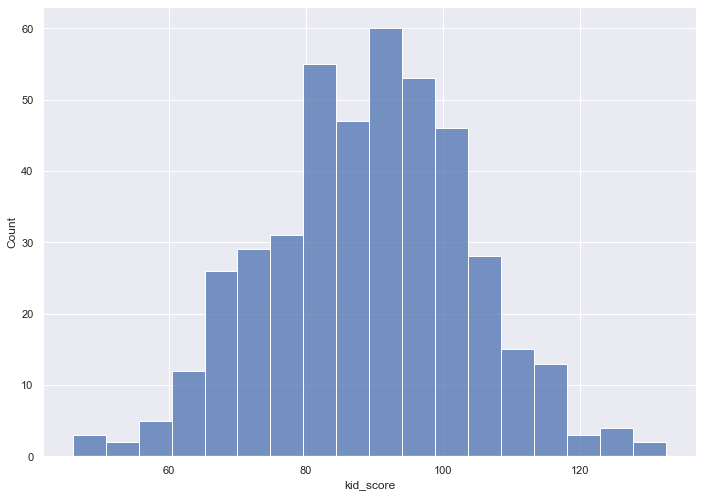

In [252]:
sns.histplot(df_sim.kid_score)

<AxesSubplot:xlabel='kid_score', ylabel='Count'>

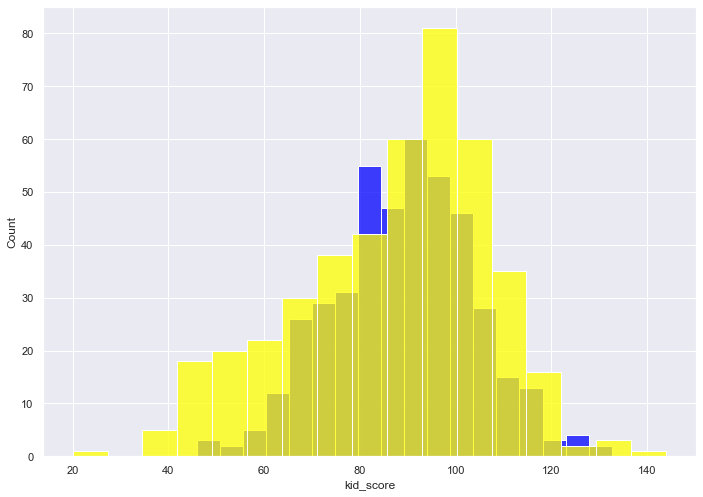

In [253]:
fig, ax = plt.subplots()
sns.histplot(df_sim.kid_score, ax = ax, color="blue")
sns.histplot(values.kid_score, ax = ax, color='yellow')

## clusters

In [254]:
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters=3)
kmodel.fit(values)

KMeans(n_clusters=3)

In [255]:
kmodel.cluster_centers_

array([[ 59.70338983,   0.66949153,  90.44199283,   2.72033898,
         22.51694915],
       [102.71851852,   0.88888889, 117.28837143,   3.02222222,
         23.0962963 ],
       [ 92.58563536,   0.78453039,  93.33654532,   2.91712707,
         22.72928177]])

In [256]:
res = values.copy()
res["cluster"] = kmodel.labels_
res.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,cluster
0,65,1.0,121.117529,4,27,0
1,98,1.0,89.361882,4,25,2
2,85,1.0,115.443165,4,27,1
3,83,1.0,99.449639,3,25,2
4,115,1.0,92.745710,4,27,2


In [257]:
res.groupby("cluster").mean().transpose()

cluster,0,1,2
kid_score,59.703390,102.718519,92.585635
mom_hs,0.669492,0.888889,0.784530
mom_iq,90.441993,117.288371,93.336545
mom_work,2.720339,3.022222,2.917127
mom_age,22.516949,23.096296,22.729282


In [258]:
res.groupby("cluster").std().transpose()

cluster,0,1,2
kid_score,11.466271,12.444295,9.816631
mom_hs,0.472402,0.315440,0.412288
mom_iq,11.401434,9.541397,7.763960
mom_work,1.253273,1.129434,1.163703
mom_age,2.571152,2.836000,2.672634


## uncertainty

In [259]:
two_dim = res.groupby("cluster").mean()[['kid_score', 'mom_iq']]
two_dim

,kid_score,mom_iq
cluster,,
0,59.703390,90.441993
1,102.718519,117.288371
2,92.585635,93.336545


<AxesSubplot:xlabel='kid_score', ylabel='mom_iq'>

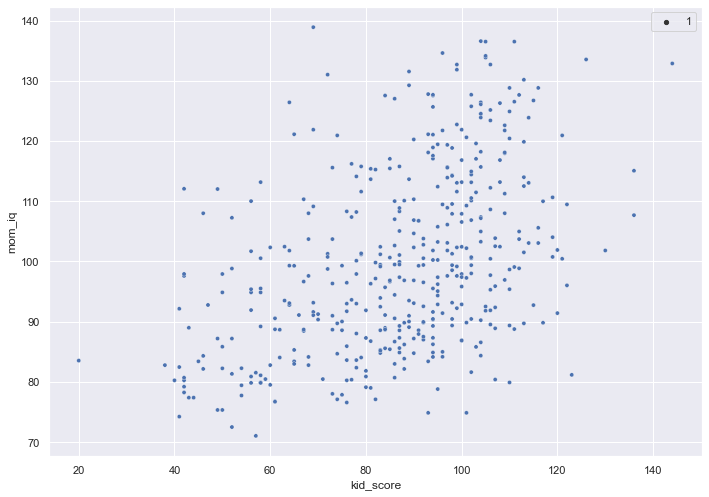

In [260]:
sns.scatterplot(data = values,
                x = 'kid_score',
                y = 'mom_iq', size = 1)

<AxesSubplot:xlabel='kid_score', ylabel='mom_iq'>

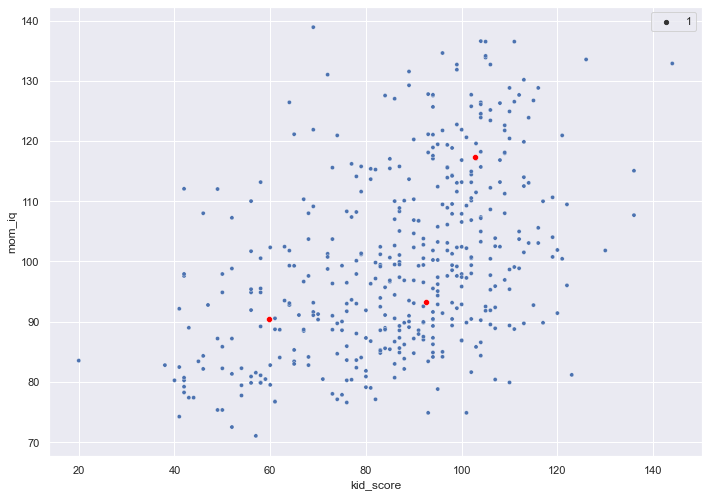

In [261]:
sns.scatterplot(data = values,
                x = 'kid_score',
                y = 'mom_iq', size = 1)
sns.scatterplot(data = two_dim,
                x = 'kid_score',
                y = 'mom_iq', color = 'red')

<AxesSubplot:xlabel='kid_score', ylabel='mom_iq'>

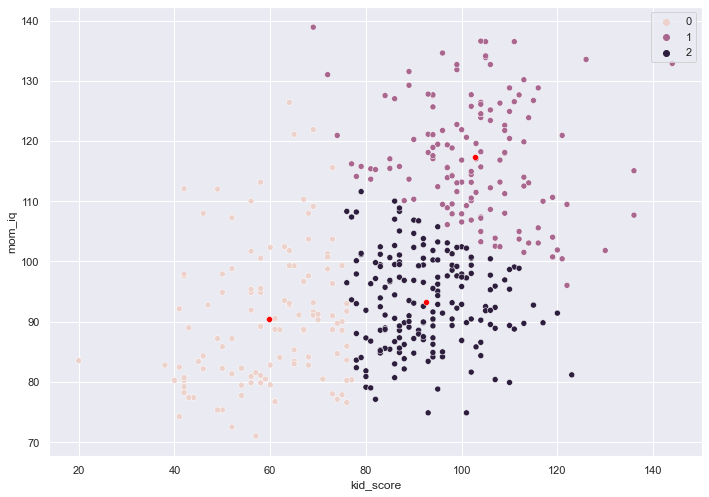

In [262]:
sns.scatterplot(data = res,
                x = 'kid_score',
                y = 'mom_iq',
                hue = 'cluster')
sns.scatterplot(data = two_dim,
                x = 'kid_score',
                y = 'mom_iq', color = 'red')

In [263]:
df_cluster_agg = res.groupby("cluster")[['kid_score', 'mom_iq']].\
    agg({
    'kid_score' : ['mean', 'std'],
    'mom_iq' : ['mean', 'std']
})
    # agg(m = ('kid_score', ['mean', 'std']), s = ('mom_iq','std'))
df_cluster_agg

kid_score                 mom_iq           
               mean        std        mean        std
cluster                                              
0         59.703390  11.466271   90.441993  11.401434
1        102.718519  12.444295  117.288371   9.541397
2         92.585635   9.816631   93.336545   7.763960

In [264]:
df_cluster_agg['kid_score']['mean'][0]

59.70338983050848

In [265]:
df_cluster_agg['kid_score']['mean']
df_cluster_agg['kid_score']['std']

cluster
0    11.466271
1    12.444295
2     9.816631
Name: std, dtype: float64

In [266]:
np.random.normal(df_cluster_agg['kid_score']['mean'], df_cluster_agg['kid_score']['std'])

array([ 93.25865632, 115.70661547,  90.7635896 ])

In [267]:
df_sim_2 = pd.DataFrame()
df_sim_temp = pd.DataFrame()
df_sim_2['kid_score'] = np.random.normal(df_cluster_agg['kid_score']['mean'], df_cluster_agg['kid_score']['std'])
df_sim_2['mom_iq'] = np.random.normal(df_cluster_agg['mom_iq']['mean'], df_cluster_agg['mom_iq']['std'])

for i in range(0, 100):
    df_sim_temp['kid_score'] = np.random.normal(df_cluster_agg['kid_score']['mean'], df_cluster_agg['kid_score']['std'])
    df_sim_temp['mom_iq'] = np.random.normal(df_cluster_agg['mom_iq']['mean'], df_cluster_agg['mom_iq']['std'])
    df_sim_2 = df_sim_2.append(df_sim_temp)

df_sim_2['cluster'] = df_sim_2.index
df_sim_2.head()

,kid_score,mom_iq,cluster
0,74.763208,87.251606,0
1,86.919877,127.069414,1
2,82.103064,99.547170,2
0,57.473599,81.848662,0
1,84.348754,119.665281,1


<AxesSubplot:xlabel='kid_score', ylabel='mom_iq'>

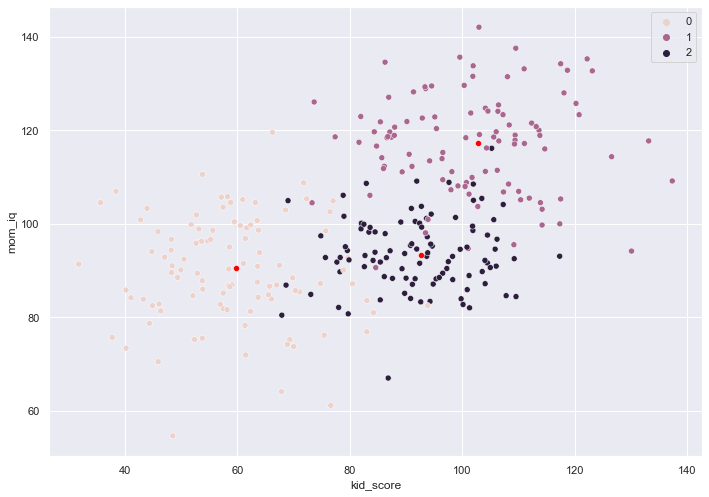

In [268]:
sns.scatterplot(data = df_sim_2,
                x = 'kid_score',
                y = 'mom_iq',
                hue = 'cluster')
sns.scatterplot(data = two_dim,
                x = 'kid_score',
                y = 'mom_iq', color = 'red')

C:\Users\wirze\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


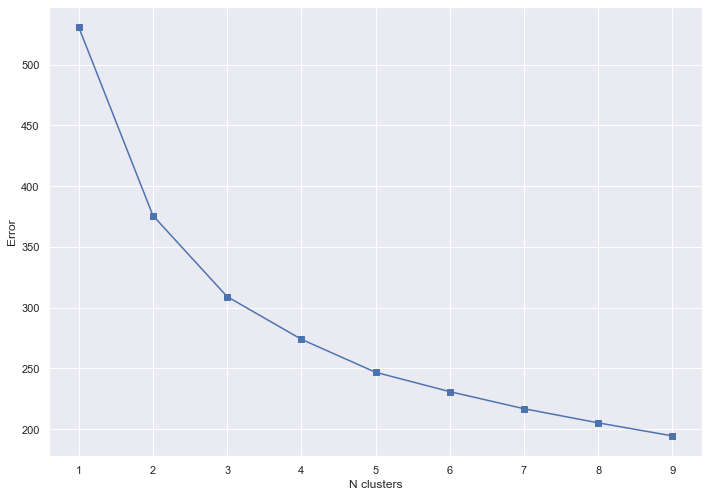

In [269]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(values)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('N clusters')
plt.ylabel('Error');

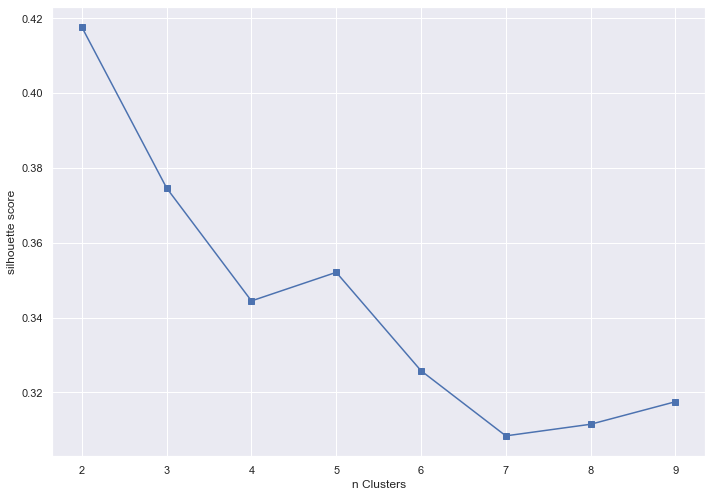

In [270]:
sil = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(values)
    sil.append(metrics.silhouette_score(values, kmeans.labels_))

plt.plot(range(2, 10), sil, marker='s');
plt.xlabel('n Clusters')
plt.ylabel('silhouette score');

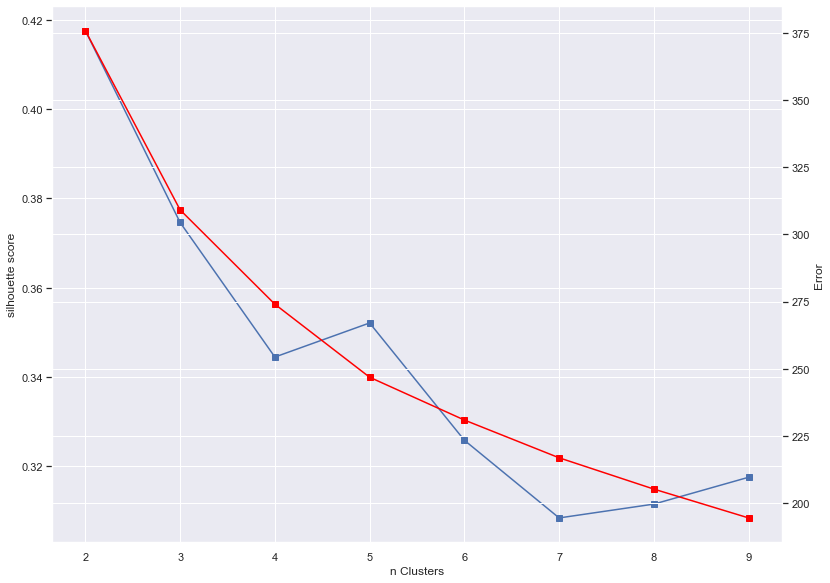

In [271]:
from sklearn import metrics
sil = []
inertia = []
max_k = 10
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(values)
    sil.append(metrics.silhouette_score(values, kmeans.labels_))
    inertia.append(np.sqrt(kmeans.inertia_))

fig, ax1 = plt.subplots()
ax1.plot(range(2, max_k), sil, marker='s')
ax1.set_xlabel('n Clusters')
ax1.set_ylabel('silhouette score')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis\
ax2.plot(range(2, max_k), inertia, marker='s', color = 'red')
ax2.set_ylabel('Error')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()